In [1]:
import pandas as pd
import seaborn as sns

races = pd.read_csv('race.csv')
runners = pd.read_csv('ultra_rankings.csv')

#races record information for each individual races (location, id, elevation 
#etc. runners record each contestant (on high rankings) performance for each
#of these races. The merge key for the two datasets is the race_year_id

Original repo here: 
https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-10-26

In [2]:
#So we've got 137803 individual entries in race results and 1207 unique 
#races at hand.
print(len(runners))
print(len(races))

137803
1207


In [3]:
#Merge the 2 datasets by race id
merged = pd.merge(runners,races, on='race_year_id')
merged.head()

#The race info is redundant because there are multiple contestants for
#a single race... but we could work with that for now

,race_year_id,rank,runner,time,age,gender,nationality,time_in_seconds,event,race,city,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants
0,68140,1.0,VERHEUL Jasper,26H 35M 25S,30,M,GBR,95725.0,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150
1,68140,2.0,MOULDING JON,27H 0M 29S,43,M,GBR,97229.0,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150
2,68140,3.0,RICHARDSON Phill,28H 49M 7S,38,M,GBR,103747.0,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150
3,68140,4.0,DYSON Fiona,30H 53M 37S,55,W,GBR,111217.0,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150
4,68140,5.0,FRONTERAS Karen,32H 46M 21S,48,W,GBR,117981.0,Peak District Ultras,Millstone 100,Castleton,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150


In [44]:
#Since we are interested in average speed, we create that column:
merged['average_speed'] = merged['distance'] / (merged['time_in_seconds']/3600)
merged.head()

#Unit for average_speed is km/hour

,race_year_id,rank,runner,time,age,gender,nationality,time_in_seconds,event,race,...,country,date,start_time,participation,distance,elevation_gain,elevation_loss,aid_stations,participants,average_speed
0,68140,1.0,VERHEUL Jasper,26H 35M 25S,30,M,GBR,95725.0,Peak District Ultras,Millstone 100,...,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,6.276730
1,68140,2.0,MOULDING JON,27H 0M 29S,43,M,GBR,97229.0,Peak District Ultras,Millstone 100,...,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,6.179638
2,68140,3.0,RICHARDSON Phill,28H 49M 7S,38,M,GBR,103747.0,Peak District Ultras,Millstone 100,...,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,5.791396
3,68140,4.0,DYSON Fiona,30H 53M 37S,55,W,GBR,111217.0,Peak District Ultras,Millstone 100,...,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,5.402412
4,68140,5.0,FRONTERAS Karen,32H 46M 21S,48,W,GBR,117981.0,Peak District Ultras,Millstone 100,...,United Kingdom,2021-09-03,19:00:00,solo,166.9,4520,-4520,10,150,5.092684


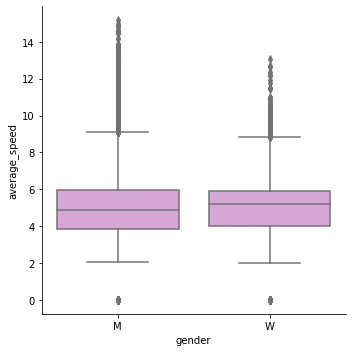

In [5]:
# Exploratory Data Analysis - Average Speed vs. Gender

# Drop 1st Max Outlier
max_speed = merged["average_speed"].max()
max_speed_index = merged.index[merged["average_speed"] == max_speed]

merged = merged.drop(index = max_speed_index)


# Drop 2nd Max Outlier
max_speed2 = merged["average_speed"].max()
max_speed_index2 = merged.index[merged["average_speed"] == max_speed2]

merged = merged.drop(index = max_speed_index2)


sns.catplot(x = "gender", y = "average_speed", kind = "box", data = merged, color = "plum")

<AxesSubplot:xlabel='nationality'>

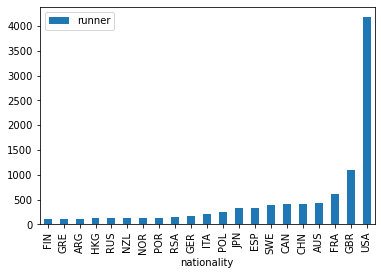

In [49]:
# Nationalities with at least 100 top 10 runners
top10 = merged[merged["rank"] <= 10]

top10_count = top10.groupby("nationality")["runner"].count().sort_values()

dftop10_count = pd.DataFrame(top10_count)

df = top10_count.to_frame()
df_100 = df[df["runner"] >=100]
df_100.reset_index().plot(x='nationality', y='runner', kind = "bar")

<AxesSubplot:xlabel='nationality'>

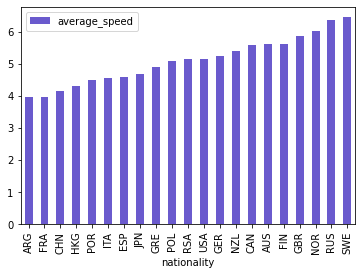

In [71]:
# Compare Average Speeds for countries with at least 100 top 10 runners

df_100_inner = merged.merge(df_100, on = "nationality")

df_100_inner_avg_speed = df_100_inner.groupby("nationality")["average_speed"].mean("average_speed").sort_values()
df_100_inner_avg_speed = pd.DataFrame(df_100_inner_avg_speed)

df_100_inner_avg_speed.reset_index().plot(x='nationality', y='average_speed', kind = "bar", color = "slateblue")

<AxesSubplot:xlabel='nationality'>

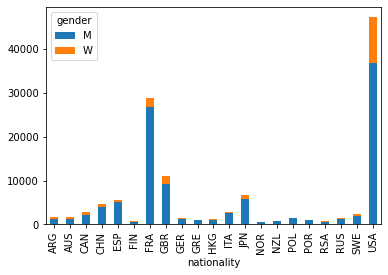

In [60]:
# Male and Female Composition for Countries with at least 100 top 10 runners
df_100_inner.groupby(['nationality', 'gender']).size().unstack().plot(kind='bar', stacked=True)

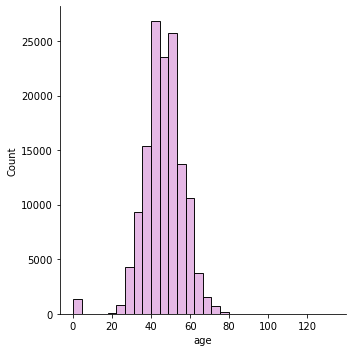

In [74]:
# Distribution of Age

sns.displot(data = merged, bins = 30, x = "age", color = "plum")

<AxesSubplot:xlabel='age', ylabel='average_speed'>

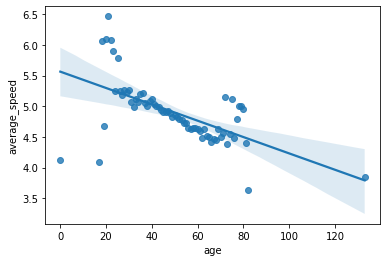

In [86]:
# Relationship between average_speed and age

age_avg_speed = merged.groupby("age")["average_speed"].mean("average_speed")
age_avg_speed

age_avg_speed_df = pd.DataFrame(age_avg_speed)
age_avg_speed_df

# age_avg_speed_df.reset_index().plot(x='age', y='average_speed', kind = "scatter")
sns.regplot(x=age_avg_speed_df.index, y="average_speed", data=age_avg_speed_df)
# sns.relplot(data = merged, x = "age", y = "average_speed")

In [8]:
#We can start by computing the average of average_speed for male & female 
#contestants 
merged.groupby(['gender']).mean('average_speed')['average_speed']

#Notice the result is very close, but again we do have lots of entries for
#both gender. We can do a hypothesis test to figure out if such tiny diffe
#erence is significant by performing a bootstrap sampling:

gender
M    4.884041
W    4.884091
Name: average_speed, dtype: float64

In [9]:
#first grab the average speed for male and female runners across all races
male = merged[merged['gender'] == 'M']
female = merged[merged['gender'] == 'W']
male_speed = male['average_speed'].dropna()
female_speed = female['average_speed'].dropna()

#perform bootstrapping: repeat 500 times
import numpy as np
reps = 500
male_bootstrap = np.random.choice(male_speed, size=(reps,len(male_speed)),replace = True)
female_bootstrap = np.random.choice(female_speed, size=(reps,len(female_speed)),replace = True)

#Then compute the mean for each bootstrap sample
male_boot_mean = male_bootstrap.mean(axis=1)
female_boot_mean = female_bootstrap.mean(axis=1)

#Confidence interval for average of average speed for male & female runners
male_ci_lower = np.percentile(male_boot_mean, 2.5)
male_ci_higher = np.percentile(male_boot_mean, 97.5)
female_ci_lower = np.percentile(female_boot_mean, 2.5)
female_ci_higher = np.percentile(female_boot_mean, 97.5)

print(male_ci_lower,male_ci_higher)
print(female_ci_lower,female_ci_higher)

4.872855466287007 4.894846757373088
4.856784061773895 4.9085496274498714


Conclusion: Since the two confidence intervals actually overlap, so we conclude that the average speed for male and female runners are not significantly different